<a href="https://colab.research.google.com/github/omnianasser449-lab/Marketing-Analytics-Portfolio/blob/main/Ames_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 House Price Prediction Project
**Goal:** Predict the sale price of houses using the Ames Housing Dataset.
**Approach:** In this project, I performed end-to-end data cleaning, feature engineering, and built a Linear Regression model.

### 📋 Project Workflow:
1. **Data Cleaning:** Handling missing values and removing redundant features.
2. **Feature Engineering:** Transforming variables to help the model learn better.
3. **Modeling:** Training a Linear Regression algorithm.
4. **Evaluation:** Measuring performance using RMSE (Root Mean Squared Error).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL=('/train.csv')
df= pd.read_csv(URL)
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

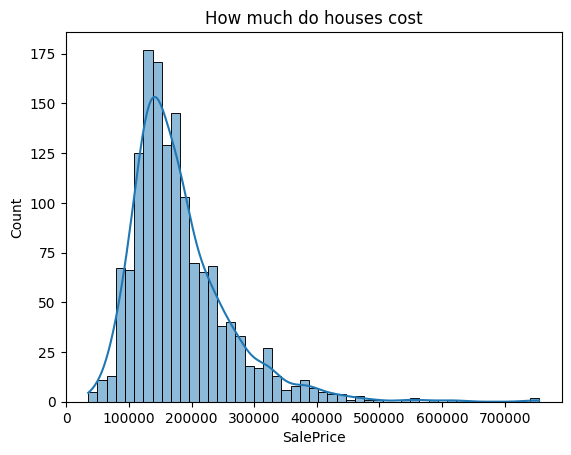

In [3]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('How much do houses cost')
plt.show()

In [4]:
df=df.drop(columns=['Id','Alley','PoolQC', 'Fence','MiscFeature'], errors='ignore')
df['HasMisc']=df['MiscVal'].apply(lambda x: 1 if x>0 else 0)
df['HasPool']=df['PoolArea'].apply(lambda x:1 if x>0 else 0)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

In [5]:
df_final =pd.get_dummies(df)
df_final=df.fillna(df_final.median())

print("New Data Shape:", df_final.shape)
print("Are there any missing values left?", df_final.isnull().sum().any())

New Data Shape: (1460, 78)
Are there any missing values left? True


In [6]:
print(df_final.columns[df_final.isnull().any()])

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


In [7]:
none_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
             'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in none_cols:
    df[col] = df[col].fillna("None")

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

df_final = pd.get_dummies(df)

df_final = df_final.fillna(df_final.median())

print("Are there any missing values left?", df_final.isnull().sum().any())

Are there any missing values left? False


In [8]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['SalePrice'])
y = np.log1p(df_final['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training rows: {len(X_train)}")
print(f"Testing rows: {len(X_test)}")

Training rows: 1168
Testing rows: 292


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy_score = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Final Model Score: {accuracy_score:.4f}")

Final Model Score: 0.1282


In [10]:
predictions_log = model.predict(X_test)

final_predictions = np.expm1(predictions_log)
actual_prices = np.expm1(y_test)

comparison = pd.DataFrame({
    'Actual Price': actual_prices,
    'Predicted Price': final_predictions,
    'Difference ($)': actual_prices - final_predictions
})

print(comparison.head())

      Actual Price  Predicted Price  Difference ($)
892       154500.0    153622.851954      877.148046
1105      325000.0    342909.148303   -17909.148303
413       115000.0     98866.998059    16133.001941
522       159000.0    164344.285081    -5344.285081
1036      315500.0    312964.118816     2535.881184


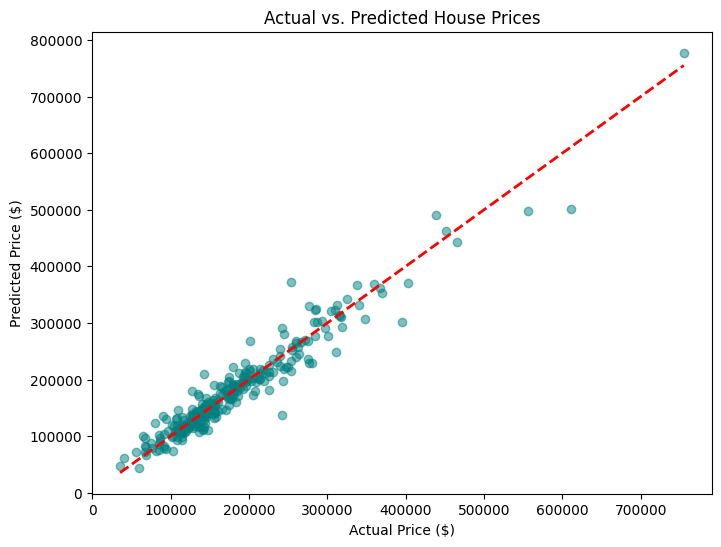

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(actual_prices, final_predictions, alpha=0.5, color='teal')
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs. Predicted House Prices')
plt.show()